In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import statsmodels
import statsmodels.api as sm

from sklearn import svm
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from xgboost import XGBClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE

from warnings import filterwarnings
filterwarnings('ignore')



## Importing and Analysis on the Target Dataset 

In [ ]:
df_train1=pd.read_csv(r'/content/Train1.csv')

In [ ]:
df_train1.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,Yes


In [ ]:
df_train1.shape

(5410, 2)

In [ ]:
df_train1.info()

# 5410 entries and  2 columns
# object(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [ ]:
df_train1.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,Yes


In [ ]:
df_train1['PotentialFraud'].value_counts()

No     3871
Yes    1539
Name: PotentialFraud, dtype: int64

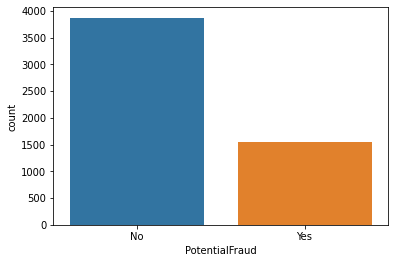

In [ ]:
sns.countplot(df_train1['PotentialFraud'])

In [ ]:
(df_train1['PotentialFraud'].value_counts()/len(df_train))*100

No     71.55268
Yes    28.44732
Name: PotentialFraud, dtype: float64

In [ ]:
# There are two lables in the dataset YES and NO
# The lables are divided in the ratio 70:30 

In [ ]:
df_train.isnull().sum()     

Provider          0
PotentialFraud    0
dtype: int64

In [ ]:
# There is no missing values in the Train dataset

## **Importing the Beneficiary, Inpatient and Outpatient Dataset**

In [ ]:
df_inpatient=pd.read_csv(r'/content/Train_Inpatientdata.csv')

In [ ]:
df_outpatient=pd.read_csv(r'/content/Train_Outpatientdata.csv')

In [ ]:
df_beneficiary=pd.read_csv(r'/content/Train_Beneficiarydata.csv')

In [ ]:
df_train=pd.read_csv(r'/content/Train.csv')

In [ ]:
df_train['PotentialFraud']=pd.get_dummies(df_train['PotentialFraud'],drop_first=True)

In [ ]:
df_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [ ]:
df_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [ ]:
df_beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

## **Merging the Datasets**

In [ ]:
# The .isin() method compares if the first series object is present in second series
# We will compare initially to avoide duplicates 

In [ ]:
df_inpatient['Provider'].isin(df_outpatient['Provider']).value_counts()

True     36727
False     3747
Name: Provider, dtype: int64

In [ ]:
df_inpatient['AttendingPhysician'].isin(df_outpatient['AttendingPhysician']).value_counts()

False    29270
True     11204
Name: AttendingPhysician, dtype: int64

In [ ]:
df_inpatient['OperatingPhysician'].isin(df_outpatient['OperatingPhysician']).value_counts()

True     20601
False    19873
Name: OperatingPhysician, dtype: int64

In [ ]:
df_beneficiary['BeneID'].isin(df_inpatient['BeneID']).value_counts()

False    107267
True      31289
Name: BeneID, dtype: int64

In [ ]:
df_beneficiary['BeneID'].isin(df_outpatient['BeneID']).value_counts()

True     133980
False      4576
Name: BeneID, dtype: int64

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [ ]:
df_inpatient.shape

(40474, 30)

In [ ]:
df_outpatient.shape

(517737, 27)

In [ ]:
df_beneficiary.shape

(138556, 25)

In [ ]:
df_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [ ]:
df_inpatient['BeneID'].isin(df_beneficiary['BeneID']).value_counts()

True    40474
Name: BeneID, dtype: int64

**Merging beneficiary and inpatient dataset**

In [ ]:
df_BI=pd.merge(left=df_beneficiary,right=df_inpatient,how='inner',on='BeneID')

In [ ]:
df_BI.shape

(40474, 54)

In [ ]:
df_BI.isnull().sum()

BeneID                                 0
DOB                                    0
DOD                                40156
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

**Merging beneficiary and outpatient dataset**

In [ ]:
df_BO=pd.merge(left=df_beneficiary,right=df_outpatient,how='inner',on='BeneID')

In [ ]:
df_BO.shape

(517737, 51)

In [ ]:
df_BO.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                513924
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

**Merging bene-inpatient and bene-outpatient dataset**

In [ ]:
df_BIO=pd.merge(left=df_BI,right=df_BO,how='outer')

In [ ]:
df_BIO.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [ ]:
df_BI.shape

(40474, 54)

In [ ]:
df_BO.shape

(517737, 51)

In [ ]:
df_BIO.shape

(558211, 54)

In [ ]:
df_BIO.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


**Merging df_BIO and Train (Traget) dataset**

In [ ]:
df_BIOP=pd.merge(left=df_BIO,right=df_train,how='inner',on='Provider')

In [ ]:
df_BIOP.shape

(558211, 55)

In [ ]:
df_BIOP['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

## **Final Merged Dataset - df_BIOP**

In [ ]:
df_BIOP.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE17521,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1
2,BENE21718,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1
3,BENE22934,1930-07-01,NaN,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE24402,1925-09-01,NaN,2,2,0,39,510,12,12,1,2,2,1,2,2,2,1,2,2,2,3000,1068,8900,740,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,1748,1068.0,2009-01-12,593,2330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# Hence, df_BIOP is the proper dataset. Target variable is 'PotentialFraud. all other variables are independent variable

## **Outlier Analysis and Treatment**

In [ ]:
df_BIOP['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [ ]:
# Replacing the Y as 1 in the RenalDiseaseIndicator column

df_BIOP['RenalDiseaseIndicator']=df_BIOP['RenalDiseaseIndicator'].replace({'Y':1,'0':0})

In [ ]:
df_BIOP['RenalDiseaseIndicator'].value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator, dtype: int64

In [ ]:
df_BIOP['RenalDiseaseIndicator']=df_BIOP['RenalDiseaseIndicator'].astype('int')

In [ ]:
df_BIOP['PotentialFraud']=df_BIOP['PotentialFraud'].astype('int')

In [ ]:
df_BIOP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   DOB                              558211 non-null  object 
 2   DOD                              4131 non-null    object 
 3   Gender                           558211 non-null  int64  
 4   Race                             558211 non-null  int64  
 5   RenalDiseaseIndicator            558211 non-null  int64  
 6   State                            558211 non-null  int64  
 7   County                           558211 non-null  int64  
 8   NoOfMonths_PartACov              558211 non-null  int64  
 9   NoOfMonths_PartBCov              558211 non-null  int64  
 10  ChronicCond_Alzheimer            558211 non-null  int64  
 11  ChronicCond_Heartfailure         558211 non-null  int64  
 12  Ch

In [ ]:
df_BIOP_number=df_BIOP.select_dtypes(include=[np.number])

In [ ]:
df_BIOP_cat=df_BIOP.select_dtypes(include=[np.object])

In [ ]:
df_BIOP_cat.shape

(558211, 24)

In [ ]:
df_BIOP_number.shape

(558211, 31)

**Removing Outliers using IQR Method**

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 31 Text major ticklabel objects>)

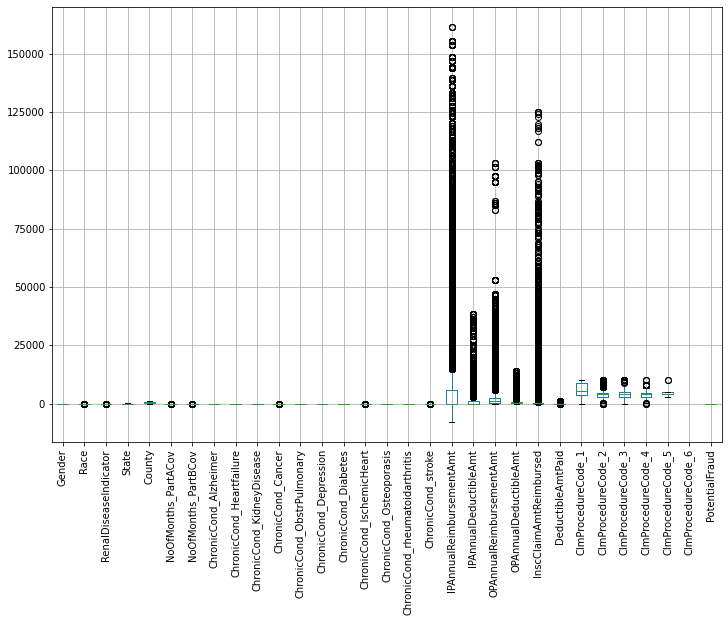

In [ ]:
plt.figure(figsize=(12,8))
df_BIOP_number.boxplot()
plt.xticks(rotation=90)

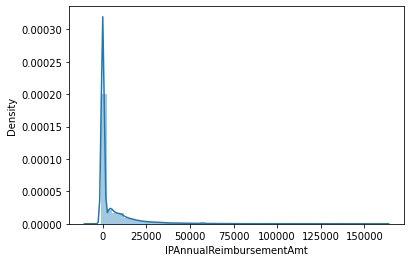

In [ ]:
sns.distplot(df_BIOP_number['IPAnnualReimbursementAmt'])

In [ ]:
q1=df_BIOP_number.quantile(0.25)
q3=df_BIOP_number.quantile(0.75)

IQR= q3-q1

LL=q1-1.5*IQR
UL=q3+1.5*IQR

len(df_BIOP_number['IPAnnualReimbursementAmt'][df_BIOP_number['IPAnnualReimbursementAmt']>UL.IPAnnualReimbursementAmt])/len(df_BIOP_number['IPAnnualReimbursementAmt'])*100
df_BIOP_number = df_BIOP_number.reset_index(drop = True)

In [ ]:
df_BIOP_number.head()

,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,26000,1068.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,19000,1068.0,7769.0,5849.0,NaN,NaN,NaN,NaN,1
2,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,17000,1068.0,9338.0,NaN,NaN,NaN,NaN,NaN,1
3,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,13000,1068.0,8154.0,NaN,NaN,NaN,NaN,NaN,1
4,2,2,0,39,510,12,12,1,2,2,1,2,2,2,1,2,2,2,3000,1068,8900,740,3000,1068.0,8543.0,NaN,NaN,NaN,NaN,NaN,1


## **Algorithmic approach for Treating Missing Values**

In [ ]:
(df_BIOP_number.isnull().sum()/len(df_BIOP))*100

Gender                               0.000000
Race                                 0.000000
RenalDiseaseIndicator                0.000000
State                                0.000000
County                               0.000000
NoOfMonths_PartACov                  0.000000
NoOfMonths_PartBCov                  0.000000
ChronicCond_Alzheimer                0.000000
ChronicCond_Heartfailure             0.000000
ChronicCond_KidneyDisease            0.000000
ChronicCond_Cancer                   0.000000
ChronicCond_ObstrPulmonary           0.000000
ChronicCond_Depression               0.000000
ChronicCond_Diabetes                 0.000000
ChronicCond_IschemicHeart            0.000000
ChronicCond_Osteoporasis             0.000000
ChronicCond_rheumatoidarthritis      0.000000
ChronicCond_stroke                   0.000000
IPAnnualReimbursementAmt             0.000000
IPAnnualDeductibleAmt                0.000000
OPAnnualReimbursementAmt             0.000000
OPAnnualDeductibleAmt             

In [ ]:
df_BIOP_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender                           558211 non-null  int64  
 1   Race                             558211 non-null  int64  
 2   RenalDiseaseIndicator            558211 non-null  int64  
 3   State                            558211 non-null  int64  
 4   County                           558211 non-null  int64  
 5   NoOfMonths_PartACov              558211 non-null  int64  
 6   NoOfMonths_PartBCov              558211 non-null  int64  
 7   ChronicCond_Alzheimer            558211 non-null  int64  
 8   ChronicCond_Heartfailure         558211 non-null  int64  
 9   ChronicCond_KidneyDisease        558211 non-null  int64  
 10  ChronicCond_Cancer               558211 non-null  int64  
 11  ChronicCond_ObstrPulmonary       558211 non-null  int64  
 12  Ch

In [ ]:
df_BIOP_number.drop(['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)

In [ ]:
df_BIOP.drop(['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)

In [ ]:
df_BIOP_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender                           558211 non-null  int64  
 1   Race                             558211 non-null  int64  
 2   RenalDiseaseIndicator            558211 non-null  int64  
 3   State                            558211 non-null  int64  
 4   County                           558211 non-null  int64  
 5   NoOfMonths_PartACov              558211 non-null  int64  
 6   NoOfMonths_PartBCov              558211 non-null  int64  
 7   ChronicCond_Alzheimer            558211 non-null  int64  
 8   ChronicCond_Heartfailure         558211 non-null  int64  
 9   ChronicCond_KidneyDisease        558211 non-null  int64  
 10  ChronicCond_Cancer               558211 non-null  int64  
 11  ChronicCond_ObstrPulmonary       558211 non-null  int64  
 12  Ch

In [ ]:
(df_BIOP_cat.isnull().sum()/len(df_BIOP_cat))*100

BeneID                    0.000000
DOB                       0.000000
DOD                      99.259957
ClaimID                   0.000000
ClaimStartDt              0.000000
ClaimEndDt                0.000000
Provider                  0.000000
AttendingPhysician        0.270149
OperatingPhysician       79.497538
OtherPhysician           64.218548
AdmissionDt              92.749337
ClmAdmitDiagnosisCode    73.863109
DischargeDt              92.749337
DiagnosisGroupCode       92.749337
ClmDiagnosisCode_1        1.872589
ClmDiagnosisCode_2       35.041588
ClmDiagnosisCode_3       56.458221
ClmDiagnosisCode_4       70.524407
ClmDiagnosisCode_5       79.949517
ClmDiagnosisCode_6       84.881702
ClmDiagnosisCode_7       88.144805
ClmDiagnosisCode_8       90.425843
ClmDiagnosisCode_9       92.509105
ClmDiagnosisCode_10      99.102490
dtype: float64

In [ ]:
df_BIOP_cat.drop(['DOD','AdmissionDt','DischargeDt','DiagnosisGroupCode','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'],axis=1,inplace=True)

In [ ]:
 df_BIOP.drop(['DOD','AdmissionDt','DischargeDt','DiagnosisGroupCode','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'],axis=1,inplace=True)

In [ ]:
(df_BIOP_cat.isnull().sum()/len(df_BIOP_cat))*100

BeneID                    0.000000
DOB                       0.000000
ClaimID                   0.000000
ClaimStartDt              0.000000
ClaimEndDt                0.000000
Provider                  0.000000
AttendingPhysician        0.270149
OperatingPhysician       79.497538
OtherPhysician           64.218548
ClmAdmitDiagnosisCode    73.863109
ClmDiagnosisCode_1        1.872589
ClmDiagnosisCode_2       35.041588
ClmDiagnosisCode_3       56.458221
ClmDiagnosisCode_4       70.524407
ClmDiagnosisCode_5       79.949517
dtype: float64

In [ ]:
df_BIOP_cat['OperatingPhysician'].value_counts()

PHY330576    424
PHY424897    293
PHY314027    256
PHY423534    250
PHY357120    249
            ... 
PHY325611      1
PHY337628      1
PHY327505      1
PHY377003      1
PHY380208      1
Name: OperatingPhysician, Length: 35315, dtype: int64

In [ ]:
df_BIOP_cat['OperatingPhysician']=df_BIOP_cat['OperatingPhysician'].replace(np.nan,'PHY330576')

In [ ]:
df_BIOP_cat['AttendingPhysician'].value_counts()

PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
             ... 
PHY406744       1
PHY397331       1
PHY419338       1
PHY362188       1
PHY392440       1
Name: AttendingPhysician, Length: 82063, dtype: int64

In [ ]:
df_BIOP_cat['AttendingPhysician']=df_BIOP_cat['AttendingPhysician'].replace(np.nan,'PHY330576')

In [ ]:
df_BIOP_cat['OtherPhysician'].value_counts()

PHY412132    1247
PHY341578    1098
PHY338032    1070
PHY337425    1041
PHY347064     806
             ... 
PHY405512       1
PHY363943       1
PHY401255       1
PHY342357       1
PHY392440       1
Name: OtherPhysician, Length: 46457, dtype: int64

In [ ]:
df_BIOP_cat['OtherPhysician']=df_BIOP_cat['OtherPhysician'].replace(np.nan,'PHY412132')

In [ ]:
df_BIOP_cat['ClmAdmitDiagnosisCode'].value_counts()

V7612    4074
42731    3634
78605    2992
4019     2732
25000    2368
         ... 
4352        1
80226       1
3885        1
71895       1
5192        1
Name: ClmAdmitDiagnosisCode, Length: 4098, dtype: int64

In [ ]:
df_BIOP_cat['ClmAdmitDiagnosisCode']=df_BIOP_cat['ClmAdmitDiagnosisCode'].replace(np.nan,'V7612')

In [ ]:
df_BIOP_cat['ClmDiagnosisCode_1'].value_counts()

4019     13886
4011     12512
2724      3606
2720      3210
2722      3028
         ...  
74344        1
0261         1
20192        1
9792         1
80123        1
Name: ClmDiagnosisCode_1, Length: 10450, dtype: int64

In [ ]:
df_BIOP_cat['ClmDiagnosisCode_1']=df_BIOP_cat['ClmDiagnosisCode_1'].replace(np.nan,'4019')

In [ ]:
df_BIOP_cat['ClmDiagnosisCode_2'].value_counts()

4019     22378
25000    11744
2724     11272
V5861     9716
V5869     9669
         ...  
34440        1
71807        1
7049         1
20260        1
71525        1
Name: ClmDiagnosisCode_2, Length: 5300, dtype: int64

In [ ]:
df_BIOP_cat['ClmDiagnosisCode_2']=df_BIOP_cat['ClmDiagnosisCode_2'].replace(np.nan,'4019')

In [ ]:
df_BIOP_cat['ClmDiagnosisCode_3'].value_counts()

4019     14408
25000     7946
2724      7368
V5869     6069
V5861     4180
         ...  
5834         1
73008        1
0412         1
83400        1
3341         1
Name: ClmDiagnosisCode_3, Length: 4756, dtype: int64

In [ ]:
df_BIOP_cat['ClmDiagnosisCode_3']=df_BIOP_cat['ClmDiagnosisCode_3'].replace(np.nan,'4019')

In [ ]:
df_BIOP_cat['ClmDiagnosisCode_4'].value_counts()

4019     9188
25000    5250
2724     4764
V5869    3367
2449     2523
         ... 
5111        1
2982        1
72764       1
24940       1
27952       1
Name: ClmDiagnosisCode_4, Length: 4359, dtype: int64

In [ ]:
df_BIOP_cat['ClmDiagnosisCode_4']=df_BIOP_cat['ClmDiagnosisCode_4'].replace(np.nan,'4019')

In [ ]:
df_BIOP_cat['ClmDiagnosisCode_5'].value_counts()

4019     6005
25000    3451
2724     2945
V5869    1921
2449     1647
         ... 
35801       1
38812       1
3342        1
81221       1
35571       1
Name: ClmDiagnosisCode_5, Length: 3970, dtype: int64

In [ ]:
df_BIOP_cat['ClmDiagnosisCode_5']=df_BIOP_cat['ClmDiagnosisCode_5'].replace(np.nan,'4019')

In [ ]:
df_BIOP_cat.isnull().sum()

BeneID                   0
DOB                      0
ClaimID                  0
ClaimStartDt             0
ClaimEndDt               0
Provider                 0
AttendingPhysician       0
OperatingPhysician       0
OtherPhysician           0
ClmAdmitDiagnosisCode    0
ClmDiagnosisCode_1       0
ClmDiagnosisCode_2       0
ClmDiagnosisCode_3       0
ClmDiagnosisCode_4       0
ClmDiagnosisCode_5       0
dtype: int64

In [ ]:
df_BIOP_number.isnull().sum()

Gender                               0
Race                                 0
RenalDiseaseIndicator                0
State                                0
County                               0
NoOfMonths_PartACov                  0
NoOfMonths_PartBCov                  0
ChronicCond_Alzheimer                0
ChronicCond_Heartfailure             0
ChronicCond_KidneyDisease            0
ChronicCond_Cancer                   0
ChronicCond_ObstrPulmonary           0
ChronicCond_Depression               0
ChronicCond_Diabetes                 0
ChronicCond_IschemicHeart            0
ChronicCond_Osteoporasis             0
ChronicCond_rheumatoidarthritis      0
ChronicCond_stroke                   0
IPAnnualReimbursementAmt             0
IPAnnualDeductibleAmt                0
OPAnnualReimbursementAmt             0
OPAnnualDeductibleAmt                0
InscClaimAmtReimbursed               0
DeductibleAmtPaid                  899
PotentialFraud                       0
dtype: int64

In [ ]:
(df_BIOP.isnull().sum()/len(df_BIOP))*100

BeneID                              0.000000
DOB                                 0.000000
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDeductibleAmt               0.000000
OPAnnualRe

In [ ]:
df_BIOP['OperatingPhysician']=df_BIOP['OperatingPhysician'].replace(np.nan,'PHY330576')
df_BIOP['AttendingPhysician']=df_BIOP['AttendingPhysician'].replace(np.nan,'PHY330576')
df_BIOP['OtherPhysician']=df_BIOP['OtherPhysician'].replace(np.nan,'PHY412132')
df_BIOP['ClmAdmitDiagnosisCode']=df_BIOP['ClmAdmitDiagnosisCode'].replace(np.nan,'V7612')
df_BIOP['ClmDiagnosisCode_1']=df_BIOP['ClmDiagnosisCode_1'].replace(np.nan,'4019')
df_BIOP['ClmDiagnosisCode_2']=df_BIOP['ClmDiagnosisCode_2'].replace(np.nan,'4019')
df_BIOP['ClmDiagnosisCode_3']=df_BIOP['ClmDiagnosisCode_3'].replace(np.nan,'4019')
df_BIOP['ClmDiagnosisCode_4']=df_BIOP['ClmDiagnosisCode_4'].replace(np.nan,'4019')
df_BIOP['ClmDiagnosisCode_5']=df_BIOP['ClmDiagnosisCode_5'].replace(np.nan,'4019')

In [ ]:
df_BIOP.isnull().sum()

BeneID                               0
DOB                                  0
Gender                               0
Race                                 0
RenalDiseaseIndicator                0
State                                0
County                               0
NoOfMonths_PartACov                  0
NoOfMonths_PartBCov                  0
ChronicCond_Alzheimer                0
ChronicCond_Heartfailure             0
ChronicCond_KidneyDisease            0
ChronicCond_Cancer                   0
ChronicCond_ObstrPulmonary           0
ChronicCond_Depression               0
ChronicCond_Diabetes                 0
ChronicCond_IschemicHeart            0
ChronicCond_Osteoporasis             0
ChronicCond_rheumatoidarthritis      0
ChronicCond_stroke                   0
IPAnnualReimbursementAmt             0
IPAnnualDeductibleAmt                0
OPAnnualReimbursementAmt             0
OPAnnualDeductibleAmt                0
ClaimID                              0
ClaimStartDt             

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fancyimpute import KNN,IterativeImputer

In [ ]:
knn=KNN()

In [ ]:
df_BIOP_knn=df_BIOP.copy()

In [ ]:
df_BIOP_knn['DeductibleAmtPaid'].isnull().sum()

899

In [ ]:
df_BIOP['DeductibleAmtPaid']=df_BIOP['DeductibleAmtPaid'].replace(np.nan,df_BIOP['DeductibleAmtPaid'].median())
df_BIOP['InscClaimAmtReimbursed']=df_BIOP['InscClaimAmtReimbursed'].replace(np.nan,df_BIOP['InscClaimAmtReimbursed'].median())

In [ ]:
df_BIOP.isnull().sum()

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
ClaimID                            0
ClaimStartDt                       0
ClaimEndDt                         0
P

In [ ]:
df_BIOP.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,PotentialFraud
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,PHY330576,PHY412132,7866,1068.0,1970,4019,5853,7843,2768,1
1,BENE17521,1913-12-01,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,1068.0,4240,2639,2948,40390,45821,1
2,BENE21718,1922-10-01,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,PHY412132,V5789,1068.0,V5789,4168,73313,7812,7993,1
3,BENE22934,1930-07-01,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,1068.0,71535,71960,4019,V1202,4240,1
4,BENE24402,1925-09-01,2,2,0,39,510,12,12,1,2,2,1,2,2,2,1,2,2,2,3000,1068,8900,740,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,PHY412132,1748,1068.0,2330,4019,4019,4019,4019,1


In [ ]:
df_BIOP['PatientRiskScore']=df_BIOP['ChronicCond_Alzheimer']+df_BIOP['ChronicCond_Cancer']+df_BIOP['ChronicCond_Depression']+df_BIOP['ChronicCond_Diabetes']+df_BIOP['ChronicCond_Heartfailure']+df_BIOP['ChronicCond_IschemicHeart']+df_BIOP['ChronicCond_KidneyDisease']+df_BIOP['ChronicCond_ObstrPulmonary']+df_BIOP['ChronicCond_Osteoporasis']+df_BIOP['ChronicCond_rheumatoidarthritis']+df_BIOP['ChronicCond_stroke']

In [ ]:
df_BIOP['TotalReimbursement']=df_BIOP['IPAnnualReimbursementAmt']+df_BIOP['OPAnnualReimbursementAmt']

In [ ]:
df_BIOP['TotalDeductibleamount']=df_BIOP['IPAnnualDeductibleAmt']+df_BIOP['OPAnnualDeductibleAmt']

In [ ]:
df_BIOP.isnull().sum()

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
ClaimID                            0
ClaimStartDt                       0
ClaimEndDt                         0
P

In [ ]:
df_BIOP['Year of Birth'] = pd.DatetimeIndex(df_BIOP['DOB']).year

In [ ]:
df_BIOP.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,PotentialFraud,PatientRiskScore,TotalReimbursement,TotalDeductibleamount,Year of Birth
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,PHY330576,PHY412132,7866,1068.0,1970,4019,5853,7843,2768,1,15,36060,3274,1943
1,BENE17521,1913-12-01,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,1068.0,4240,2639,2948,40390,45821,1,17,19100,1088,1913
2,BENE21718,1922-10-01,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,PHY412132,V5789,1068.0,V5789,4168,73313,7812,7993,1,20,18050,1608,1922
3,BENE22934,1930-07-01,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,1068.0,71535,71960,4019,V1202,4240,1,16,27450,2296,1930
4,BENE24402,1925-09-01,2,2,0,39,510,12,12,1,2,2,1,2,2,2,1,2,2,2,3000,1068,8900,740,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,PHY412132,1748,1068.0,2330,4019,4019,4019,4019,1,19,11900,1808,1925


In [ ]:
df_BIOP.info()

# Outliers are treated and the data is clean now


<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 44 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   DOB                              558211 non-null  object 
 2   Gender                           558211 non-null  int64  
 3   Race                             558211 non-null  int64  
 4   RenalDiseaseIndicator            558211 non-null  int64  
 5   State                            558211 non-null  int64  
 6   County                           558211 non-null  int64  
 7   NoOfMonths_PartACov              558211 non-null  int64  
 8   NoOfMonths_PartBCov              558211 non-null  int64  
 9   ChronicCond_Alzheimer            558211 non-null  int64  
 10  ChronicCond_Heartfailure         558211 non-null  int64  
 11  ChronicCond_KidneyDisease        558211 non-null  int64  
 12  Ch

## **Saving the Final dataframe**


## **Making a copy of the Original Merged Dataset**

In [ ]:
df_final=df_BIOP.copy()

In [ ]:
df_final=df_final.iloc[:,[27,0,1,43,2,3,5,6,7,8,4,9,10,11,12,13,14,15,16,17,18,19,40,20,22,41,28,21,23,42,33,24,25,26,29,30,31,32,34,35,36,37,38,39]]

In [ ]:
df_final.head()

,Provider,BeneID,DOB,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid,ClaimID,ClaimStartDt,ClaimEndDt,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,PotentialFraud
0,PRV55912,BENE11001,1943-01-01,1943,1,1,39,230,12,12,0,1,2,1,2,2,1,1,1,2,1,1,15,36000,60,36060,26000,3204,70,3274,1068.0,CLM46614,2009-04-12,2009-04-18,PHY390922,PHY330576,PHY412132,7866,1970,4019,5853,7843,2768,1
1,PRV55912,BENE17521,1913-12-01,1913,2,1,39,230,12,12,0,1,1,1,2,1,2,2,1,2,2,2,17,19000,100,19100,19000,1068,20,1088,1068.0,CLM34721,2009-01-20,2009-02-01,PHY349293,PHY370861,PHY363291,45340,4240,2639,2948,40390,45821,1
2,PRV55912,BENE21718,1922-10-01,1922,1,1,39,600,12,12,0,2,2,2,2,2,2,2,1,1,2,2,20,17000,1050,18050,17000,1068,540,1608,1068.0,CLM72336,2009-10-17,2009-11-04,PHY334706,PHY334706,PHY412132,V5789,V5789,4168,73313,7812,7993,1
3,PRV55912,BENE22934,1930-07-01,1930,2,1,39,280,12,12,0,2,1,2,2,1,2,1,1,1,1,2,16,27000,450,27450,13000,2136,160,2296,1068.0,CLM73394,2009-10-25,2009-10-29,PHY390614,PHY323689,PHY363291,71946,71535,71960,4019,V1202,4240,1
4,PRV55912,BENE24402,1925-09-01,1925,2,2,39,510,12,12,0,1,2,2,1,2,2,2,1,2,2,2,19,3000,8900,11900,3000,1068,740,1808,1068.0,CLM32911,2009-01-08,2009-01-12,PHY380413,PHY432598,PHY412132,1748,2330,4019,4019,4019,4019,1


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 44 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         558211 non-null  object 
 1   BeneID                           558211 non-null  object 
 2   DOB                              558211 non-null  object 
 3   Year of Birth                    558211 non-null  int64  
 4   Gender                           558211 non-null  int64  
 5   Race                             558211 non-null  int64  
 6   State                            558211 non-null  int64  
 7   County                           558211 non-null  int64  
 8   NoOfMonths_PartACov              558211 non-null  int64  
 9   NoOfMonths_PartBCov              558211 non-null  int64  
 10  RenalDiseaseIndicator            558211 non-null  int64  
 11  ChronicCond_Alzheimer            558211 non-null  int64  
 12  Ch

## **Separating the Target and Independent Variables**

In [ ]:
# Numerical values in df_final_num

df_final_num=df_final.select_dtypes(include=[np.number])
df_final_num.columns

Index(['Year of Birth', 'Gender', 'Race', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'PatientRiskScore', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt', 'TotalReimbursement',
       'InscClaimAmtReimbursed', 'IPAnnualDeductibleAmt',
       'OPAnnualDeductibleAmt', 'TotalDeductibleamount', 'DeductibleAmtPaid',
       'PotentialFraud'],
      dtype='object')

In [ ]:
# Categorical values in df_final_cat

df_final_cat=df_final.select_dtypes(include=[np.object])
df_final_cat.columns

Index(['Provider', 'BeneID', 'DOB', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5'],
      dtype='object')

In [ ]:
df_final_num.head()

,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid,PotentialFraud
0,1943,1,1,39,230,12,12,0,1,2,1,2,2,1,1,1,2,1,1,15,36000,60,36060,26000,3204,70,3274,1068.0,1
1,1913,2,1,39,230,12,12,0,1,1,1,2,1,2,2,1,2,2,2,17,19000,100,19100,19000,1068,20,1088,1068.0,1
2,1922,1,1,39,600,12,12,0,2,2,2,2,2,2,2,1,1,2,2,20,17000,1050,18050,17000,1068,540,1608,1068.0,1
3,1930,2,1,39,280,12,12,0,2,1,2,2,1,2,1,1,1,1,2,16,27000,450,27450,13000,2136,160,2296,1068.0,1
4,1925,2,2,39,510,12,12,0,1,2,2,1,2,2,2,1,2,2,2,19,3000,8900,11900,3000,1068,740,1808,1068.0,1


In [ ]:
# Seperating the traget and independent variables

y = df_final_num.PotentialFraud
x1 = df_final_num.drop('PotentialFraud',1)


In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

# standardize all the columns of the dataframe 'df_ipl_dummy'
num_scaled = rs.fit_transform(x1)

In [ ]:
X = pd.DataFrame(num_scaled,columns = x1.columns)
X.head()

,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid
0,0.571429,-1.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-0.666667,6.000000,-0.521127,4.376135,99.692308,3.0,-0.402985,1.898507,1068.0
1,-1.571429,0.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,3.166667,-0.502347,2.176394,72.769231,1.0,-0.477612,0.267164,1068.0
2,-0.928571,-1.0,0.0,0.555556,0.595238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.000000,2.833333,-0.056338,2.040208,65.076923,1.0,0.298507,0.655224,1068.0
3,-0.357143,0.0,0.0,0.555556,-0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-0.333333,4.500000,-0.338028,3.259403,49.692308,2.0,-0.268657,1.168657,1068.0
4,-0.714286,0.0,1.0,0.555556,0.380952,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.500000,3.629108,1.242542,11.230769,1.0,0.597015,0.804478,1068.0


In [ ]:
X.head()

,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid
0,0.571429,-1.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-0.666667,6.000000,-0.521127,4.376135,99.692308,3.0,-0.402985,1.898507,1068.0
1,-1.571429,0.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,3.166667,-0.502347,2.176394,72.769231,1.0,-0.477612,0.267164,1068.0
2,-0.928571,-1.0,0.0,0.555556,0.595238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.000000,2.833333,-0.056338,2.040208,65.076923,1.0,0.298507,0.655224,1068.0
3,-0.357143,0.0,0.0,0.555556,-0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-0.333333,4.500000,-0.338028,3.259403,49.692308,2.0,-0.268657,1.168657,1068.0
4,-0.714286,0.0,1.0,0.555556,0.380952,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.500000,3.629108,1.242542,11.230769,1.0,0.597015,0.804478,1068.0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: PotentialFraud, dtype: int64

In [ ]:
df_final.dtypes

Provider                            object
BeneID                              object
DOB                                 object
Year of Birth                        int64
Gender                               int64
Race                                 int64
State                                int64
County                               int64
NoOfMonths_PartACov                  int64
NoOfMonths_PartBCov                  int64
RenalDiseaseIndicator                int64
ChronicCond_Alzheimer                int64
ChronicCond_Heartfailure             int64
ChronicCond_KidneyDisease            int64
ChronicCond_Cancer                   int64
ChronicCond_ObstrPulmonary           int64
ChronicCond_Depression               int64
ChronicCond_Diabetes                 int64
ChronicCond_IschemicHeart            int64
ChronicCond_Osteoporasis             int64
ChronicCond_rheumatoidarthritis      int64
ChronicCond_stroke                   int64
PatientRiskScore                     int64
IPAnnualRei

In [ ]:
df_final.InscClaimAmtReimbursed = df_final.InscClaimAmtReimbursed.astype('int64')
df_final.DeductibleAmtPaid = df_final.DeductibleAmtPaid.astype('int64')

In [ ]:
df_final.dtypes


Provider                           object
BeneID                             object
DOB                                object
Year of Birth                       int64
Gender                              int64
Race                                int64
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
RenalDiseaseIndicator               int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
PatientRiskScore                    int64
IPAnnualReimbursementAmt          

**Scaling and adding the constant column for Logistic Reg**

In [ ]:
x_constant = X.copy()

In [ ]:
y = df_final_num.PotentialFraud

In [ ]:
x_constant = sm.add_constant(x_constant,has_constant ='skip')
x_constant.head()

,const,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid
0,1.0,0.571429,-1.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-0.666667,6.000000,-0.521127,4.376135,99.692308,3.0,-0.402985,1.898507,1068.0
1,1.0,-1.571429,0.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,3.166667,-0.502347,2.176394,72.769231,1.0,-0.477612,0.267164,1068.0
2,1.0,-0.928571,-1.0,0.0,0.555556,0.595238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.000000,2.833333,-0.056338,2.040208,65.076923,1.0,0.298507,0.655224,1068.0
3,1.0,-0.357143,0.0,0.0,0.555556,-0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-0.333333,4.500000,-0.338028,3.259403,49.692308,2.0,-0.268657,1.168657,1068.0
4,1.0,-0.714286,0.0,1.0,0.555556,0.380952,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.500000,3.629108,1.242542,11.230769,1.0,0.597015,0.804478,1068.0


## **Train Test Split**

#### Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.4

In [ ]:
# this split is for the Logistic Regression with the constant column

X_train_const,X_test_const,y_train_const,y_test_const = train_test_split(x_constant,y,test_size = 0.2,random_state = 10)

print('X_train_const', X_train_const.shape)
print('y_train_const', y_train_const.shape)

# print dimension of test set
print('X_test_const', X_test_const.shape)
print('y_test_const', y_test_const.shape)

X_train_const (446568, 29)
y_train_const (446568,)
X_test_const (111643, 29)
y_test_const (111643,)


In [ ]:
X_train_const.head(2)

,const,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid
551674,1.0,-0.928571,-1.0,0.0,0.259259,-0.071429,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,-1.333333,0.0,0.014085,-0.145266,0.461538,0.0,-0.283582,-0.432836,0.0
275479,1.0,-0.214286,0.0,0.0,0.259259,-0.595238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.000000,0.0,-0.399061,-0.259403,-0.230769,0.0,-0.208955,-0.395522,0.0


In [ ]:
y_train_const.head(2)

551674    0
275479    0
Name: PotentialFraud, dtype: int64

In [ ]:
X_test_const.head(2)

,const,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid
355816,1.0,-0.714286,0.0,0.0,-0.703704,-0.642857,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,1.023474,0.133593,0.461538,0.0,0.328358,-0.126866,0.0
361712,1.0,-1.357143,0.0,0.0,0.296296,-0.666667,0.0,0.0,1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.666667,6.2,8.300469,6.968872,0.846154,3.0,6.104478,5.152239,0.0


In [ ]:
y_test_const.head(2)

355816    1
361712    0
Name: PotentialFraud, dtype: int64

In [ ]:
X_test_const.isnull().sum()

const                              0
Year of Birth                      0
Gender                             0
Race                               0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
RenalDiseaseIndicator              0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
PatientRiskScore                   0
IPAnnualReimbursementAmt           0
OPAnnualReimbursementAmt           0
TotalReimbursement                 0
InscClaimAmtReimbursed             0
IPAnnualDeductibleAmt              0
OPAnnualDeductibleAmt              0
T

## Models

#### Create a generalized function to create a dataframe containing the scores for the models.

In [ ]:

score_card = pd.DataFrame(columns=['Model_Name','Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(algorithm_name,model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test_const)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                                    'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test_const, y_pred),
                                    'Precision Score': metrics.precision_score(y_test_const, y_pred),
                                    'Recall Score': metrics.recall_score(y_test_const, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test_const, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test_const, y_pred),
                                    'f1-score': metrics.f1_score(y_test_const, y_pred)}, 
                                    ignore_index = True)

### 1. Logistic Full Model

In [ ]:
# Build a full logistic model on a training dataset.

logreg = LogisticRegression()

logreg.fit(X_train_const,y_train_const)

LogisticRegression()

In [ ]:
# let 'y_pred_prob' be the predicted values of y

y_pred_prob = logreg.predict(X_test_const)

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'

y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [ ]:
# printing the scores for the model

print("roc_auc_score:",metrics.roc_auc_score(y_test_const, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test_const, y_pred))
print("precision_score:",metrics.precision_score(y_test_const, y_pred))
print("accuracy_score:",metrics.accuracy_score(y_test_const, y_pred))
print("recall_score:",metrics.recall_score(y_test_const, y_pred))
print("f1_score:",metrics.f1_score(y_test_const, y_pred))

roc_auc_score: 0.5299385819624793
cohen_kappa_score: 0.07076587691243563
precision_score: 0.5827138717399521
accuracy_score: 0.6281898551633331
recall_score: 0.10800270882469701
f1_score: 0.1822301024428684


In [ ]:
acc_table = classification_report(y_test_const, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.63      0.95      0.76     68820
           1       0.58      0.11      0.18     42823

    accuracy                           0.63    111643
   macro avg       0.61      0.53      0.47    111643
weighted avg       0.61      0.63      0.54    111643



In [2]:
!pip install BeautifulTable

In [4]:
#reference :https://stackoverflow.com/questions/8356501/python-format-tabular-output

from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers= ["Model Name",'Accuracy','Precision ','Recall', "F1 Score"," AUC ",'Kappa']


### 2. Log Reg - Youden's Index

In [ ]:
logreg_youden = LogisticRegression()
logreg_youden.fit(X_train_const,y_train_const)

LogisticRegression()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_const, y_pred_prob)

In [ ]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.108003,0.048126,1,0.059877
1,0.000000,0.000000,2,0.000000
2,1.000000,1.000000,0,0.000000


In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.15 else 1 for x in y_pred_prob]

In [ ]:
# calculate various performance measures

acc_table = classification_report(y_test_const, y_pred_youden)
print(acc_table)

              precision    recall  f1-score   support

           0       0.63      0.95      0.76     68820
           1       0.58      0.11      0.18     42823

    accuracy                           0.63    111643
   macro avg       0.61      0.53      0.47    111643
weighted avg       0.61      0.63      0.54    111643



In [ ]:
print("f1_score:",f1_score(y_test_const, y_pred_youden))

f1_score: 0.1822301024428684


In [ ]:
print("roc_auc_score:",metrics.roc_auc_score(y_test_const, y_pred_youden))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test_const, y_pred_youden))

roc_auc_score: 0.5299385819624793
cohen_kappa_score: 0.07076587691243563


### 3. Log Reg - Recursive Feature Elimination (RFE)

In [ ]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 

X_train_rfe = X_train_const.iloc[:,1:]
X_test_rfe = X_test_const.iloc[:,1:]

# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg, n_features_to_select = 10)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train_const)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Year of Birth', 'Race', 'State', 'County', 'ChronicCond_Depression',
       'ChronicCond_Osteoporasis', 'TotalReimbursement',
       'IPAnnualDeductibleAmt', 'OPAnnualDeductibleAmt',
       'TotalDeductibleamount'],
      dtype='object')


#### Build the logisitc regression model using the variables obtained from RFE.

In [ ]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# consider the variables obtained from RFE method and the intercept term


logreg_rfe = sm.Logit(y_train_const, X_train_const[['Race', 'State', 'County', 'ChronicCond_Alzheimer',
       'ChronicCond_Depression', 'ChronicCond_rheumatoidarthritis',
       'PatientRiskScore', 'TotalReimbursement', 'OPAnnualDeductibleAmt',
       'TotalDeductibleamount']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.667614
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         PotentialFraud   No. Observations:               446568
Model:                          Logit   Df Residuals:                   446558
Method:                           MLE   Df Model:                            9
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:               -0.004887
Time:                        13:34:45   Log-Likelihood:            -2.9813e+05
converged:                       True   LL-Null:                   -2.9669e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Race                                0.0194      0.004      4.590  

In [ ]:
y_pred_prob_rfe = logreg_rfe.predict(X_test_const[['Race', 'State', 'County', 'ChronicCond_Alzheimer',
       'ChronicCond_Depression', 'ChronicCond_rheumatoidarthritis',
       'PatientRiskScore', 'TotalReimbursement', 'OPAnnualDeductibleAmt',
       'TotalDeductibleamount']])

# print the y_pred_prob_rfe
y_pred_prob_rfe

355816    0.393618
361712    0.418950
68901     0.321580
417661    0.399150
252020    0.449854
            ...   
164731    0.301458
90116     0.378489
225146    0.447075
312732    0.459660
140237    0.285913
Length: 111643, dtype: float64

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_rfe = [ 0 if x < 0.62 else 1 for x in y_pred_prob_rfe]

In [ ]:
result = classification_report(y_test_const, y_pred_rfe)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.62      1.00      0.76     68820
           1       0.53      0.00      0.00     42823

    accuracy                           0.62    111643
   macro avg       0.57      0.50      0.38    111643
weighted avg       0.58      0.62      0.47    111643



In [ ]:
print("roc_auc_score:",metrics.roc_auc_score(y_test_const, y_pred_rfe))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test_const, y_pred_rfe))

roc_auc_score: 0.5001276513177527
cohen_kappa_score: 0.0003146749752944711


### 4. Log Reg - GridSearchCV

#### Use GridSearchCV to find best parameters for Logistic Regression

In [ ]:
# https://www.kaggle.com/enespolat/grid-search-with-logistic-regression
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
logreg_cv.fit(X_train_const, y_train_const)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print("best parameters = ",logreg_cv.best_params_)
print("roc_auc_score :",logreg_cv.best_score_)

best parameters =  {'C': 1.0, 'penalty': 'l2'}
roc_auc_score : 0.5557068998920524


#### Now train with best parameters using LogisticRegression

In [ ]:
log_reg = LogisticRegression(C = 1.0, penalty='l2')
log_reg.fit(X_train_const, y_train_const)

LogisticRegression()

In [ ]:
def pred_prob(clf, data): 
    # predicts the probabability of class label using the model
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc))
    plt.legend()
    plt.xlabel("False Positive Rate(FPR)", size = 14)
    plt.ylabel("True Positive Rate(TPR)", size = 14)
    plt.title("Area Under Curve", size = 16)
    plt.grid(b=True, which='major', color='g', linestyle='-')
    plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
#     print("max(tpr*(1-fpr)) = ", max(tpr*(1-fpr)), "for threshold = ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(best_t, X_train_const, x_test_const, y_train_const, y_test_const, y_train_pred, y_test_pred):
    # Confusion matrix for train and test dataset
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train_const, train_prediction)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[0])
    ax[0].set_title('Train Dataset Confusion Matrix', size = 16)
    ax[0].set_xlabel("Predicted Label", size = 14)
    ax[0].set_ylabel("Actual Label", size = 14)

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test_const, test_prediction)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[1])
    ax[1].set_title('Test Dataset Confusion Matrix', size = 16)
    ax[1].set_xlabel("Predicted Label", size = 14)
    ax[1].set_ylabel("Actual Label", size = 14)
    plt.grid()
    plt.show()
    
    return train_prediction, test_prediction

In [ ]:
def validate_model(clf, x_train_const, x_test_const, y_train_const, y_test_const):
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train_const)
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test_const)
    # calculate tpr, fpr for diffeent thresholds using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_const, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test_const, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("Train AUC = ", train_auc)
    test_auc = auc(test_fpr, test_tpr)
    print("Test AUC = ", test_auc)
    
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train_const, x_test_const, y_train_const, y_test_const, y_train_pred, y_test_pred)
#     print(len(test_prediction))
    
    train_f1_score = f1_score(y_train_const, train_prediction)
    test_f1_score = f1_score(y_test_const, test_prediction)
    
    return test_auc, test_f1_score, best_t

Train AUC =  0.5560051144822125
Test AUC =  0.5549666193866288


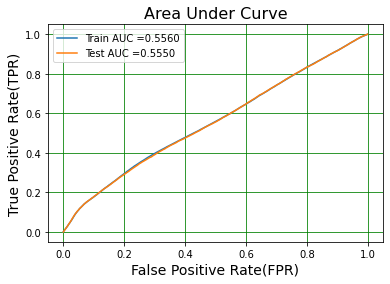

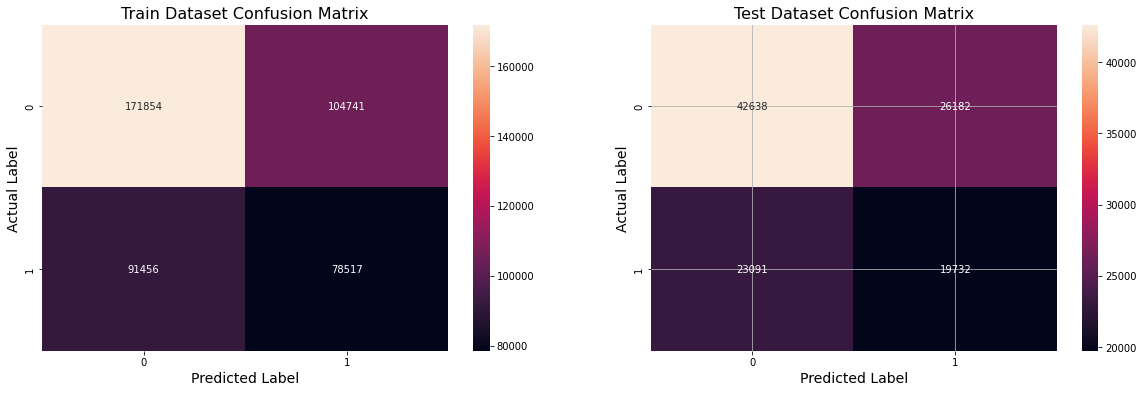

Best Threshold = 0.3773
Model AUC is : 0.5550
Model F1 Score is : 0.4447


In [ ]:
# Validate LogisticRegression model
test_auc, test_f1_score, best_t = validate_model(log_reg, X_train_const, X_test_const, y_train_const, y_test_const)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [ ]:
#Predict the response for test dataset
y_pred = log_reg.predict(X_test_const)

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_Log_cv = [ 0 if x < 0.37 else 1 for x in y_pred]

In [ ]:
acc_table = classification_report(y_test_const, y_pred_Log_cv)
print(acc_table)

              precision    recall  f1-score   support

           0       0.63      0.95      0.76     68820
           1       0.58      0.11      0.18     42823

    accuracy                           0.63    111643
   macro avg       0.61      0.53      0.47    111643
weighted avg       0.61      0.63      0.54    111643



In [ ]:
print("roc_auc_score:",metrics.roc_auc_score(y_test_const, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test_const, y_pred))

roc_auc_score: 0.5299385819624793
cohen_kappa_score: 0.07076587691243563


### 5. Base Decision Tree 

In [ ]:
y = df_final_num.PotentialFraud

In [ ]:
X.head()

,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid
0,0.571429,-1.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-0.666667,6.000000,-0.521127,4.376135,99.692308,3.0,-0.402985,1.898507,1068.0
1,-1.571429,0.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,3.166667,-0.502347,2.176394,72.769231,1.0,-0.477612,0.267164,1068.0
2,-0.928571,-1.0,0.0,0.555556,0.595238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.000000,2.833333,-0.056338,2.040208,65.076923,1.0,0.298507,0.655224,1068.0
3,-0.357143,0.0,0.0,0.555556,-0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-0.333333,4.500000,-0.338028,3.259403,49.692308,2.0,-0.268657,1.168657,1068.0
4,-0.714286,0.0,1.0,0.555556,0.380952,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.500000,3.629108,1.242542,11.230769,1.0,0.597015,0.804478,1068.0


In [ ]:
y = df_final_num.PotentialFraud

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (446568, 28)
y_train (446568,)
X_test (111643, 28)
y_test (111643,)


In [ ]:
X_train.head()

,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid
551674,-0.928571,-1.0,0.0,0.259259,-0.071429,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,-1.333333,0.0,0.014085,-0.145266,0.461538,0.0,-0.283582,-0.432836,0.0
275479,-0.214286,0.0,0.0,0.259259,-0.595238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.000000,0.0,-0.399061,-0.259403,-0.230769,0.0,-0.208955,-0.395522,0.0
335968,0.500000,-1.0,0.0,-0.074074,-0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,1.568075,0.284047,-0.076923,0.0,0.000000,-0.291045,0.0
222105,0.285714,0.0,0.0,0.814815,-0.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,-0.248826,-0.217899,0.000000,0.0,-0.358209,-0.470149,0.0
391239,-0.285714,0.0,0.0,-0.481481,0.571429,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.220657,-0.088197,0.076923,0.0,-0.179104,-0.380597,0.0


#### Create a generalized function to create a dataframe containing the scores for the models.


In [ ]:
score_card = pd.DataFrame(columns=['Model_Name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(algorithm_name,model):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                                  
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

#### Create a generalized function to calculate the metrics for the train and the test set.

In [ ]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [ ]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [ ]:
# Build a full decision tree model on a train dataset using 'gini'.

decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

### Over-fitting in Decision Tree

In [ ]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    276595
           1       0.99      0.94      0.96    169973

    accuracy                           0.97    446568
   macro avg       0.98      0.97      0.97    446568
weighted avg       0.97      0.97      0.97    446568



In [ ]:
y_pred = decision_tree.predict(X_test)
y_pred_dtrcv = [ 0 if x < 0.5 else 1 for x in y_pred]

In [ ]:
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_dtrcv))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_dtrcv))

roc_auc_score: 0.679894795044609
cohen_kappa_score: 0.36109397457499737


In [ ]:
# Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; 
# thus, we can conclude that the decision tree is over-fitted on the train data.

# If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

### 6. Decision Tree (basic tuning)

#### Build a decision tree using 'criterion = gini', 'max_depth = 70', 'min_samples_split = 60', 'max_leaf_nodes = 85'

In [ ]:
# pass the criteria 'gini' to the parameter, 'criterion' 
# max_depth: that assigns maximum depth of the tree
# min_samples_split: assigns minimum number of samples to split an internal node
# max_leaf_nodes': assigns maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code

dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 70,
                                  min_samples_split = 60,
                                  max_leaf_nodes = 85,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree1 = dt_model.fit(X_train, y_train)

# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree1)


# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree1)


# print the performance measures
print('Test data:\n', test_report)

Test data:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79     68820
           1       0.67      0.51      0.58     42823

    accuracy                           0.72    111643
   macro avg       0.71      0.68      0.69    111643
weighted avg       0.71      0.72      0.71    111643



Train AUC =  0.7458124818957557
Test AUC =  0.7436806529839517


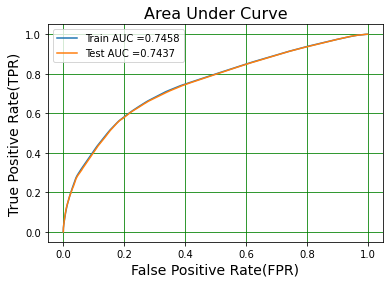

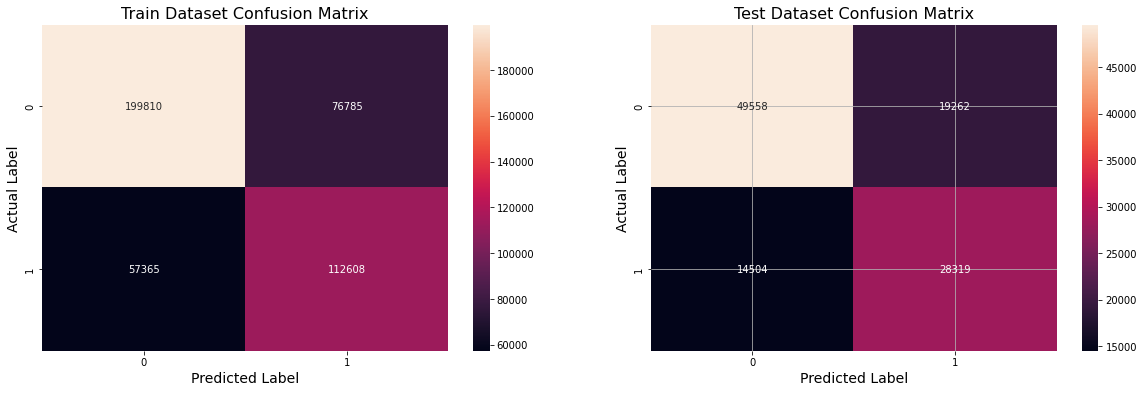

Best Threshold = 0.3607
Model AUC is : 0.7437
Model F1 Score is : 0.6265


In [ ]:

test_auc, test_f1_score, best_t = validate_model(decision_tree1, X_train, X_test, y_train, y_test)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [ ]:
y_pred = decision_tree1.predict(X_test)
y_pred_dt1 = [ 0 if x < 0.5 else 1 for x in y_pred]

In [ ]:
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_dt1))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_dt1))

roc_auc_score: 0.6794696079154122
cohen_kappa_score: 0.37590361632195257


### 7. Decision Tree - RandomizedSearchCV

In [ ]:
decisiontree = DecisionTreeClassifier() #class_weight = 'balanced'

parameters = {'criterion':['gini','entropy'], 'max_depth': [5, 10, 50, 100, 150, 200, 250, 500], 
              'min_samples_split': [5, 10, 50, 100, 150, 200, 250, 500]}

decisiontree_cv = RandomizedSearchCV(decisiontree, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
decisiontree_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 50, 100, 150, 200,
                                                      250, 500],
                                        'min_samples_split': [5, 10, 50, 100,
                                                              150, 200, 250,
                                                              500]},
                   return_train_score=True, scoring='roc_auc')

In [ ]:
print("best parameters = ",decisiontree_cv.best_params_)
print("roc_auc_score :",decisiontree_cv.best_score_)

best parameters =  {'min_samples_split': 250, 'max_depth': 50, 'criterion': 'gini'}
roc_auc_score : 0.8268156817639151


In [ ]:
dt_model1 = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 50,
                                  min_samples_split = 250,
                                  max_leaf_nodes = 200,
                                  random_state = 10)

decision_tree2 = dt_model1.fit(X_train, y_train)

train_report = get_train_report(decision_tree2)
test_report = get_test_report(decision_tree2)
print('Test data:\n', test_report)

Test data:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80     68820
           1       0.70      0.58      0.64     42823

    accuracy                           0.75    111643
   macro avg       0.73      0.71      0.72    111643
weighted avg       0.74      0.75      0.74    111643



In [255]:
dt_model1 = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 50,
                                  min_samples_split = 200,
                                  max_leaf_nodes = 120,
                                  random_state = 10)

decision_tree2 = dt_model1.fit(X_train, y_train)

train_report = get_train_report(decision_tree2)
test_report = get_test_report(decision_tree2)
print('Test data:\n', test_report)

Test data:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71     10798
           1       0.63      0.70      0.67      8547

    accuracy                           0.69     19345
   macro avg       0.69      0.69      0.69     19345
weighted avg       0.69      0.69      0.69     19345



In [ ]:
#Predict the response for test dataset
y_pred = decisiontree_cv.predict(X_test)

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]

Train AUC =  0.8608191443812728
Test AUC =  0.8320124375633436


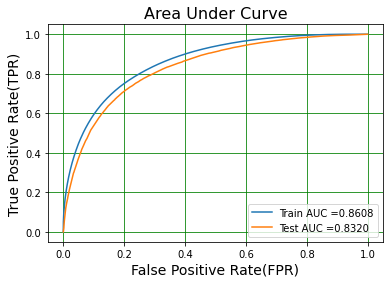

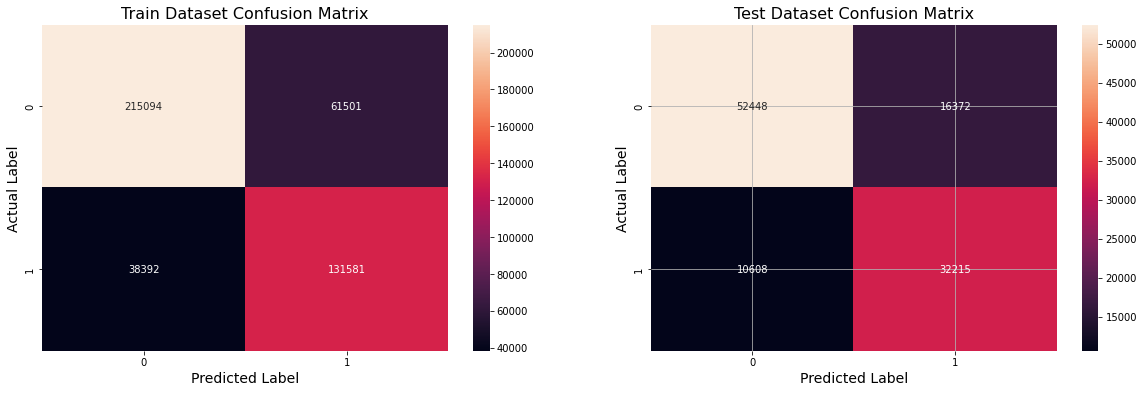

Best Threshold = 0.3797
Model AUC is : 0.8320
Model F1 Score is : 0.7048


In [ ]:

test_auc, test_f1_score, best_t = validate_model(decisiontree_cv, X_train, X_test, y_train, y_test)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [ ]:
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_prob))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_prob))

roc_auc_score: 0.7464297696126123
cohen_kappa_score: 0.5033404078802757


In [ ]:
acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     68820
           1       0.73      0.65      0.68     42823

    accuracy                           0.77    111643
   macro avg       0.76      0.75      0.75    111643
weighted avg       0.77      0.77      0.77    111643



### 8. Decision Tree - GridSearchCV 

Use GridSearchCV for DecisionTreeClassifier

In [ ]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree

decisiontree = DecisionTreeClassifier() #class_weight = 'balanced'

parameters = {'criterion':['gini','entropy'], 'max_depth': [5, 10, 50, 100, 150, 200, 250, 500], 
              'min_samples_split': [5, 10, 50, 100, 150, 200, 250, 500]}

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
decisiontree_gs = GridSearchCV(decisiontree, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)


# fit the model on X_train and y_train using fit()
decisiontree_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 50, 100, 150, 200, 250, 500],
                         'min_samples_split': [5, 10, 50, 100, 150, 200, 250,
                                               500]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print("best parameters = ",decisiontree_gs.best_params_)
print("roc_auc_score :",decisiontree_gs.best_score_)

best parameters =  {'criterion': 'gini', 'max_depth': 250, 'min_samples_split': 250}
roc_auc_score : 0.8268315210478473


In [ ]:
dt_model1 = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 250,
                                  min_samples_split = 250,
                                  max_leaf_nodes = 300,
                                  random_state = 10)

decision_tree2 = dt_model1.fit(X_train, y_train)

train_report = get_train_report(decision_tree2)
test_report = get_test_report(decision_tree2)
print('Test data:\n', test_report)

Test data:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81     68820
           1       0.71      0.62      0.66     42823

    accuracy                           0.76    111643
   macro avg       0.75      0.73      0.74    111643
weighted avg       0.75      0.76      0.75    111643



In [ ]:
#Predict the response for test dataset
y_pred = decisiontree_gs.predict(X_test)

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]

In [ ]:
acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     68820
           1       0.73      0.65      0.68     42823

    accuracy                           0.77    111643
   macro avg       0.76      0.75      0.75    111643
weighted avg       0.77      0.77      0.77    111643



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_prob))
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.7700438003278307
roc_auc_score: 0.7464443002723042


###  Base Random Forest

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [ ]:
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    276595
           1       0.96      0.92      0.94    169973

    accuracy                           0.95    446568
   macro avg       0.95      0.95      0.95    446568
weighted avg       0.95      0.95      0.95    446568



In [ ]:
# Calculate performance measures on the test set.

test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.75      0.80      0.77     68820
           1       0.63      0.56      0.60     42823

    accuracy                           0.71    111643
   macro avg       0.69      0.68      0.68    111643
weighted avg       0.70      0.71      0.70    111643



### 9. Random Forest (tuning)

In [ ]:
rf_model = RandomForestClassifier(criterion = 'gini',
                                  max_depth = 50,
                                  min_samples_split = 30,
                                  max_leaf_nodes = 65,
                                  random_state = 10)
random_forest = rf_model.fit(X_train, y_train)

train_report = get_train_report(random_forest)
print('Train data:\n', train_report)

test_report = get_test_report(random_forest)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76    276595
           1       0.62      0.16      0.25    169973

    accuracy                           0.64    446568
   macro avg       0.63      0.55      0.51    446568
weighted avg       0.63      0.64      0.57    446568

Test data:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76     68820
           1       0.61      0.15      0.25     42823

    accuracy                           0.64    111643
   macro avg       0.63      0.55      0.50    111643
weighted avg       0.63      0.64      0.56    111643



In [ ]:
y_pred = random_forest.predict(X_test)
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_prob))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_prob))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76     68820
           1       0.61      0.15      0.25     42823

    accuracy                           0.64    111643
   macro avg       0.63      0.55      0.50    111643
weighted avg       0.63      0.64      0.56    111643

roc_auc_score: 0.5471526140294732
cohen_kappa_score: 0.10983048789117023


In [ ]:
Interpretation: The accuracy of the test dataset is 0.64.

### 10. Random Forest - RandomizedSearchCV

In [ ]:
randomforest = RandomForestClassifier() #class_weight = 'balanced'

parameters = {'criterion':['gini','entropy'], 'max_depth': [5, 10, 50, 100, 150, 200, 250, 500], 'min_samples_split': [5, 10, 50, 100, 150, 200, 250, 500]}

randomforest_rc = RandomizedSearchCV(randomforest, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
randomforest_rc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 50, 100, 150, 200,
                                                      250, 500],
                                        'min_samples_split': [5, 10, 50, 100,
                                                              150, 200, 250,
                                                              500]},
                   return_train_score=True, scoring='roc_auc')

In [ ]:
print("best parameters = ",decisiontree_cv.best_params_)
print("roc_auc_score :",decisiontree_cv.best_score_)


best parameters =  {'min_samples_split': 250, 'max_depth': 50, 'criterion': 'gini'}
roc_auc_score : 0.8268156817639151


In [ ]:
rf_model1 = RandomForestClassifier(criterion = 'gini',
                                  max_depth = 50,
                                  min_samples_split = 250,
                                  max_leaf_nodes = 200,
                                  random_state = 10)

random_forest2 = rf_model1.fit(X_train, y_train)

train_report = get_train_report(random_forest2)
test_report = get_test_report(random_forest2)
print('Test data:\n', test_report)

Test data:
               precision    recall  f1-score   support

           0       0.66      0.92      0.77     68820
           1       0.64      0.24      0.35     42823

    accuracy                           0.66    111643
   macro avg       0.65      0.58      0.56    111643
weighted avg       0.65      0.66      0.61    111643



 Random Forest - GridSearchCV (not running)

In [ ]:
# randomforest1 = RandomForestClassifier() #class_weight = 'balanced'

# parameters = {'criterion':['gini','entropy'], 'max_depth': [5, 10, 50, 100, 150, 200, 250, 500], 'min_samples_split': [5, 10, 50, 100, 150, 200, 250, 500]}

# randomforest_gc = GridSearchCV(randomforest1, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
# randomforest_gc.fit(X_train, y_train)

## 11. Random Forest tuned with important Features 

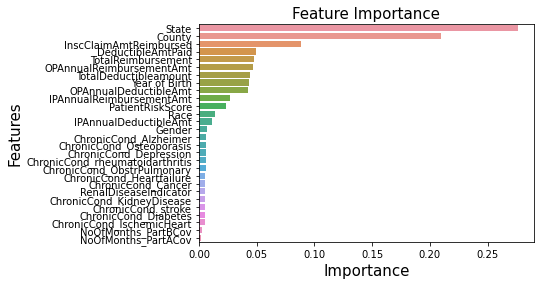

In [ ]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance

random_forest_tuned_model = RandomForestClassifier(criterion = 'entropy', max_depth = 15, 
                                                   min_samples_split = 2, n_estimators = 90,
                                                   random_state = 10)

random_forest_tuned_model = random_forest_tuned_model.fit(X_train, y_train)

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': random_forest_tuned_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [ ]:
# Interpretation: From the above bar plot, we can see that State is the most important feature in the dataset.

In [ ]:
train_report = get_train_report(random_forest_tuned_model)
print('Train data:\n', train_report)

test_report = get_test_report(random_forest_tuned_model)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.70      0.92      0.79    276595
           1       0.73      0.34      0.47    169973

    accuracy                           0.70    446568
   macro avg       0.72      0.63      0.63    446568
weighted avg       0.71      0.70      0.67    446568

Test data:
               precision    recall  f1-score   support

           0       0.68      0.90      0.78     68820
           1       0.67      0.32      0.43     42823

    accuracy                           0.68    111643
   macro avg       0.67      0.61      0.60    111643
weighted avg       0.68      0.68      0.64    111643



In [ ]:
#Predict the response for test dataset
y_pred = random_forest_tuned_model.predict(X_test)


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_prob))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_prob))

              precision    recall  f1-score   support

           0       0.68      0.90      0.78     68820
           1       0.67      0.32      0.43     42823

    accuracy                           0.68    111643
   macro avg       0.67      0.61      0.60    111643
weighted avg       0.68      0.68      0.64    111643

roc_auc_score: 0.6096569872582236
cohen_kappa_score: 0.2435622898659353


## 12. AdaBoost

In [ ]:

ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [ ]:
#Predict the response for test dataset
y_pred = ada_model.predict(X_test)


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.90      0.76     68820
           1       0.59      0.24      0.34     42823

    accuracy                           0.64    111643
   macro avg       0.62      0.57      0.55    111643
weighted avg       0.63      0.64      0.60    111643

roc_auc_score: 0.5680279042482087
cohen_kappa_score: 0.1533293629404403


In [ ]:
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.65      0.90      0.76     68820
           1       0.59      0.24      0.34     42823

    accuracy                           0.64    111643
   macro avg       0.62      0.57      0.55    111643
weighted avg       0.63      0.64      0.60    111643



## 13. Gradient Boosting

In [ ]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [ ]:
#Predict the response for test dataset
y_pred = gboost_model.predict(X_test)


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     68820
           1       0.75      0.63      0.68     42823

    accuracy                           0.77    111643
   macro avg       0.77      0.75      0.75    111643
weighted avg       0.77      0.77      0.77    111643

roc_auc_score: 0.746000725274111
cohen_kappa_score: 0.5074239474182012


In [ ]:
test_report = get_test_report(gboost_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     68820
           1       0.75      0.63      0.68     42823

    accuracy                           0.77    111643
   macro avg       0.77      0.75      0.75    111643
weighted avg       0.77      0.77      0.77    111643



## 14. XGBoost

In [ ]:
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_modelf = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_modelf.fit(X_train, y_train)

XGBClassifier(gamma=1, max_depth=10)

In [ ]:
#Predict the response for test dataset
y_pred = xgb_modelf.predict(X_test)


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.7 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     68820
           1       0.75      0.62      0.68     42823

    accuracy                           0.77    111643
   macro avg       0.77      0.74      0.75    111643
weighted avg       0.77      0.77      0.77    111643

roc_auc_score: 0.7447050008699122
cohen_kappa_score: 0.5056483212369487


In [ ]:
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(gamma=1, max_depth=10)

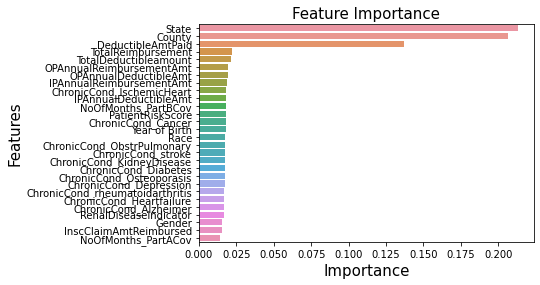

In [ ]:
xgboost_tuned_model = XGBClassifier(criterion = 'entropy', max_depth = 15, 
                                                   min_samples_split = 2, n_estimators = 90,
                                                   random_state = 10)

xgboost_tuned_model = xgboost_tuned_model.fit(X_train, y_train)

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgboost_tuned_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [ ]:
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train[['Year of Birth', 'Race', 'State', 'County', 'ChronicCond_Depression',
       'ChronicCond_Osteoporasis', 'TotalReimbursement',
       'IPAnnualDeductibleAmt', 'OPAnnualDeductibleAmt',
       'TotalDeductibleamount' ]], y_train)

XGBClassifier(gamma=1, max_depth=10)

In [ ]:
#Predict the response for test dataset
y_pred = xgb_model.predict(X_test[['Year of Birth', 'Race', 'State', 'County', 'ChronicCond_Depression',
       'ChronicCond_Osteoporasis', 'TotalReimbursement',
       'IPAnnualDeductibleAmt', 'OPAnnualDeductibleAmt',
       'TotalDeductibleamount' ]])


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.7 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     68820
           1       0.74      0.58      0.65     42823

    accuracy                           0.76    111643
   macro avg       0.76      0.73      0.73    111643
weighted avg       0.76      0.76      0.75    111643

roc_auc_score: 0.7271916388419956
cohen_kappa_score: 0.47358576013720866


## 15. knn model on a training dataset using euclidean distance (Standardized Data)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred = knn_model.predict(X_test)


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

In [ ]:
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

## 16. GaussianNB Classifier

In [ ]:
#Create a Gaussian Classifier
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

In [ ]:
# Validate NB model
test_auc, test_f1_score, best_t = validate_model(gaussian_nb, X_train, X_test, y_train, y_test)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [ ]:
#Predict the response for test dataset
y_pred = gaussian_nb.predict(X_test)


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

In [3]:
from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers= ["Model Name",'Accuracy','Precision ','Recall', "F1 Score"," AUC ",'Kappa']
table.append_row(["Log Reg", "0.63", "0.63","0.95", "0.76",'0.53','0.07'])
table.append_row(["Log Reg (cutoff)", "0.64", "0.64","0.85", "0.75",'0.53','0.07'])
table.append_row(["Log Reg RFE", "0.62", "0.62","1.00", "0.76",'0.50','0.005'])
table.append_row(["Log Reg GridSearchCV", "0.69", "0.64","0.72", "0.70",'0.60','0.019'])
table.append_row(["Base Decision Tree ", "0.98", "0.97","1.00", "0.98",'0.74','0.500'])
table.append_row(["Decision Tree (basic tuning) ", "0.72", "0.74","0.85", "0.79",'0.68','0.387'])
table.append_row(["Decision Tree RandomizedSearchCV ", "0.75", "0.76","0.85", "0.80",'0.86','0.832'])
table.append_row(["Decision Tree GridSearchCV ", "0.77", "0.80","0.85", "0.82",'0.77','0.764'])
table.append_row(["Random Forest (basic tuning) ", "0.65", "0.65","0.94", "0.77",'0.55','0.131'])
table.append_row(["Random Forest RandomizedSearchCV ", "0.66", "0.76","0.92", "0.77",'0.82','0.458'])
table.append_row(["Random Forest tuned with important Features ", "0.68", "0.68","0.90", "0.78",'0.60','0.45'])
table.append_row(["Adaboost", "0.64", "0.65","0.90", "0.76",'0.58','0.17'])
table.append_row(["Gradient Boosting", "0.75", "0.77","0.82", "0.79",'0.73','0.472'])
table.append_row(["XG Boost", "0.77", "0.79","0.82", "0.79",'0.73','0.472'])
table.append_row(["XG Boost with important Features ", "0.76", "0.79","0.84", "0.83",'0.72','0.473'])
table.append_row(["Knn", "0.66", "0.71","0.72", "0.71",'0.64','0.296'])
table.append_row(["GaussianNB", "0.60", "0.63","0.79", "0.70",'0.56','0.136'])

print(table)


+-----------------------+----------+-------+--------+----------+-------+-------+
|      Model Name       | Accuracy | Preci | Recall | F1 Score |  AUC  | Kappa |
|                       |          | sion  |        |          |       |       |
+-----------------------+----------+-------+--------+----------+-------+-------+
|        Log Reg        |   0.63   | 0.63  |  0.95  |   0.76   | 0.53  | 0.07  |
+-----------------------+----------+-------+--------+----------+-------+-------+
|   Log Reg (cutoff)    |   0.64   | 0.64  |  0.85  |   0.75   | 0.53  | 0.07  |
+-----------------------+----------+-------+--------+----------+-------+-------+
|      Log Reg RFE      |   0.62   | 0.62  |  1.0   |   0.76   |  0.5  | 0.005 |
+-----------------------+----------+-------+--------+----------+-------+-------+
| Log Reg GridSearchCV  |   0.69   | 0.64  |  0.72  |   0.7    |  0.6  | 0.019 |
+-----------------------+----------+-------+--------+----------+-------+-------+
|  Base Decision Tree   |   

C:\Users\scorp\anaconda3\lib\site-packages\beautifultable\utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
C:\Users\scorp\anaconda3\lib\site-packages\beautifultable\utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


### Selection of Model

### Results & Discussion

### Conclusion